<a href="https://colab.research.google.com/github/Eliokay/The-Repository-Seattle-Weather/blob/main/Project_1_Seattle_NYC_Weather_Analysis_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction

##### $\rightarrow$ The aim of this project is to see if it rains more in Seattle than it does in New York. I will use the data science methodology to investigate whether it rains more in Seattle, WA than in New York City, NY. The problem is simple; a lot of people think that it rains too much in Seattle, and refuses to visit me. I want to use data to determine whether it rains more in Seattle, WA than in New York City, NY.

## Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')
import missingno as msno
from vega_datasets import data
import altair as alt
from altair import datum

## Load clean data

 ##### $\rightarrow$  Cleaned dataset containing data from SeaTac and JFK weather stations from Github.

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/Eliokay/The-Repository-Seattle-Weather/main/clean_seattle_nyc_weather.csv")

##### $\rightarrow$ Review the contents of the data set.

In [4]:
df

,date,city,precipitation,month,year
0,2020-01-01,NYC,0.00,1,2020
1,2020-01-02,NYC,0.00,1,2020
2,2020-01-03,NYC,0.13,1,2020
3,2020-01-04,NYC,0.16,1,2020
4,2020-01-05,NYC,0.00,1,2020
...,...,...,...,...,...
2917,2023-12-27,SEA,0.10,12,2023
2918,2023-12-28,SEA,0.05,12,2023
2919,2023-12-29,SEA,0.00,12,2023
2920,2023-12-30,SEA,0.10,12,2023


In [5]:
df["date"] = pd.to_datetime(df["date"])

In [6]:
df.dtypes

date             datetime64[ns]
city                     object
precipitation           float64
month                     int64
year                      int64
dtype: object

In [7]:
df.describe()

,date,precipitation,month,year
count,2922,2922.000000,2922.000000,2922.000000
mean,2021-12-31 00:00:00,0.112064,6.522930,2021.498973
min,2020-01-01 00:00:00,0.000000,1.000000,2020.000000
25%,2020-12-31 00:00:00,0.000000,4.000000,2020.000000
50%,2021-12-31 00:00:00,0.000000,7.000000,2021.000000
75%,2022-12-31 00:00:00,0.080000,10.000000,2022.000000
max,2023-12-31 00:00:00,8.050000,12.000000,2023.000000
std,NaN,0.304695,3.449293,1.118531


In [8]:
df.shape

(2922, 5)

## State your questions

The overall problem is to compare how much it rains in Seattle and New York City. To answer this general problem, here are more specific questions:


##### $\rightarrow$ Where does it rain more: Seattle or New York?
##### $\rightarrow$ What is the nature of rainfall in each of these cities.
##### $\rightarrow$ How do people prefer to experience rain?

## Analysis

This aim of this code is to see if there is a general pattern of rain fall accross the four year time period

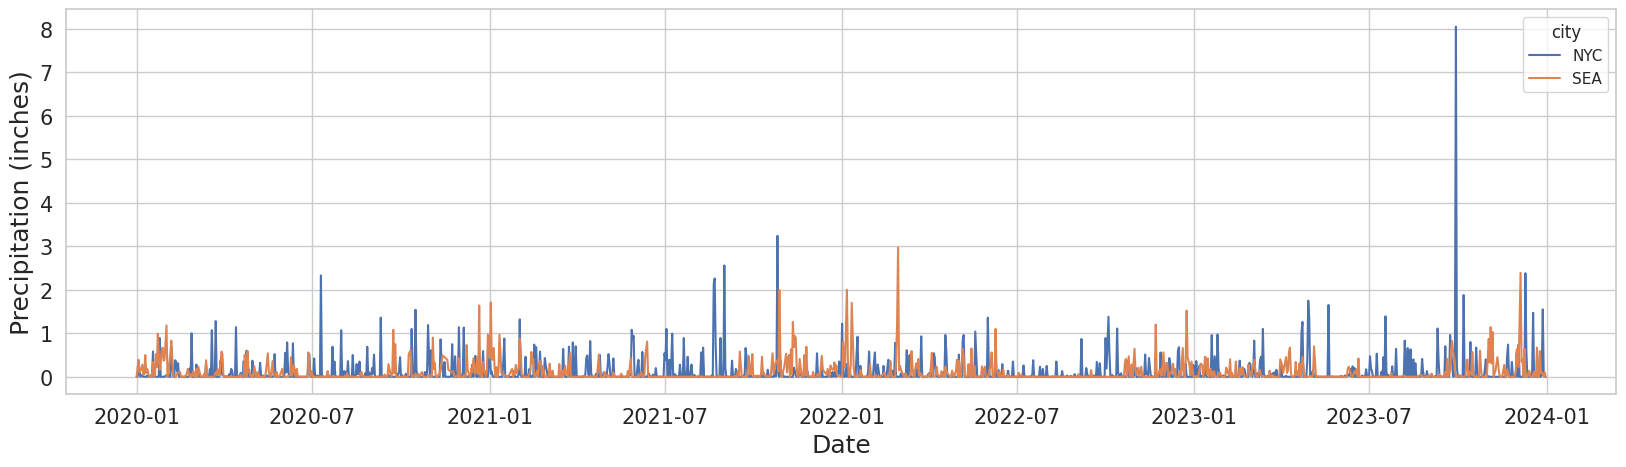

In [22]:
plt.figure(figsize=(20,5))

sns.lineplot(data=df, x='date', y='precipitation', hue='city')

plt.xlabel('Date', fontsize=18)
plt.ylabel('Precipitation (inches)', fontsize=18)

plt.tick_params(labelsize=15);

Because there are lots of data points, it is hard to see any real pattern.

A line Graph would be better at showing any pattern in this case.

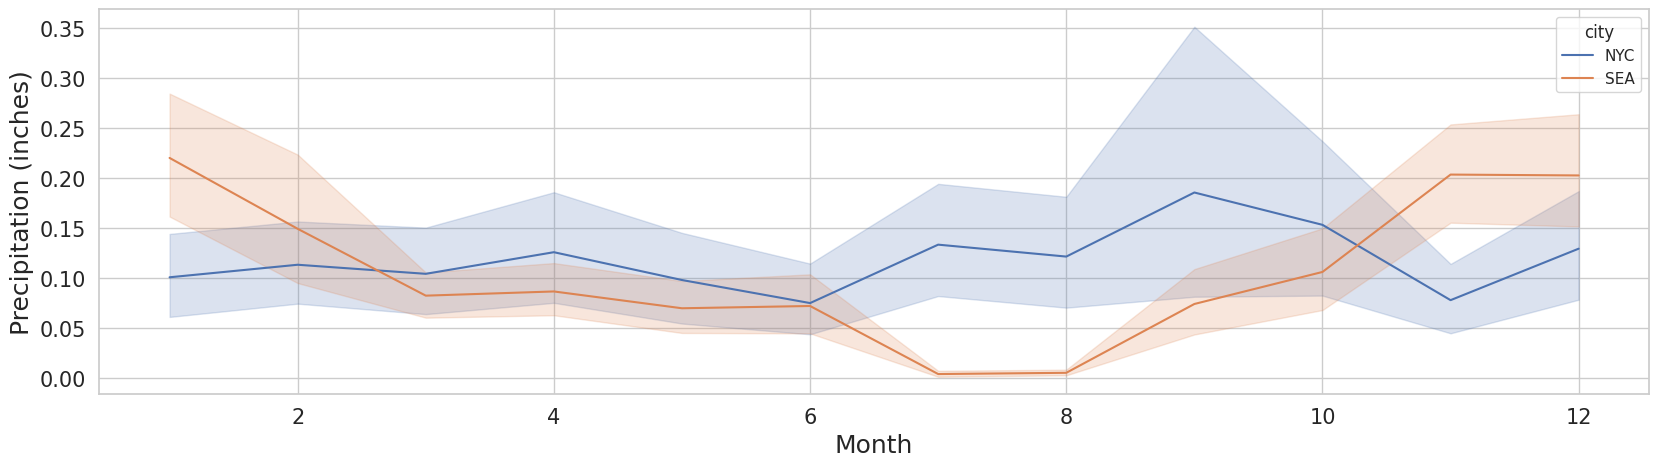

In [23]:
plt.figure(figsize=(20,5))

sns.lineplot(data=df, x='month', y='precipitation', hue='city', errorbar="ci")

plt.xlabel('Month', fontsize=18)
plt.ylabel('Precipitation (inches)', fontsize=18)

plt.tick_params(labelsize=15);

We can now see a clearer pattern - between months 6 and 8 Seattle expereinces less rain and there is a huge peak in precipitation ibetween months 8 and 10 in New York.

In [30]:
#This shows us records of days when precipitation is greater that 2 inches
extreme_rain = df[df["precipitation"] >= 2].groupby("city").describe()
extreme_rain

date                                                                 \
     count                 mean                  min                  25%   
city                                                                        
NYC      7  2022-02-20 00:00:00  2020-07-10 00:00:00  2021-08-21 12:00:00   
SEA      3  2022-09-13 08:00:00  2022-01-06 00:00:00  2022-02-01 12:00:00   

                                                                          \
                      50%                  75%                  max  std   
city                                                                       
NYC   2021-09-01 00:00:00  2022-10-12 12:00:00  2023-12-10 00:00:00  NaN   
SEA   2022-02-28 00:00:00  2023-01-16 12:00:00  2023-12-05 00:00:00  NaN   

     precipitation            ...    year           log_precip            \
             count      mean  ...     max       std      count      mean   
city                          ...                                          
NYC            7.0  3.278571  ...  2023.0  1.133893        7.0  1.069387   
SEA            3.0  2.453333  ...  2023.0  0.577350        3.0  0.884334   

                                                                  
           min       25%       50%       75%       max       std  
city                                                              
NYC   0.756122  0.830617  0.867100  1.057790  2.085672  0.468044  
SEA   0.693147  0.782220  0.871293  0.979928  1.088562  0.198030  

[2 rows x 40 columns]

This indicated that New York experiences more days of heavier rain.

## Results for communication assignment

###Plot 1

This plot shows the average rainfall in both cities over 4 years.

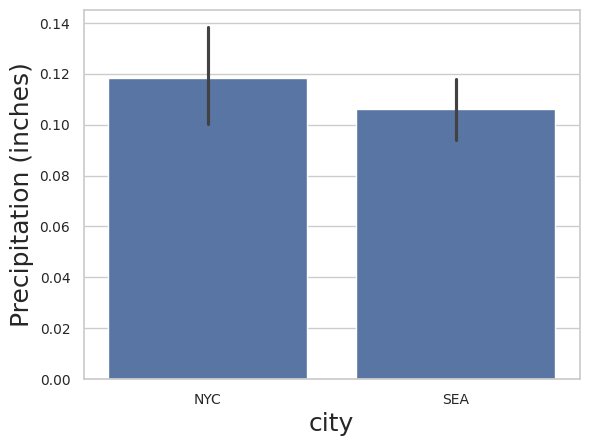

In [9]:
sns.barplot(data=df, x='city', y='precipitation')

plt.xlabel('city', fontsize=18)
plt.ylabel('Average Precipitation (inches)', fontsize=18)

plt.tick_params(labelsize=10);

From this, we can see that New York has a higher average rainfall than seattle. This might come as a shocker but we still can't say it rains more in New york from this information.

###Plot 2

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

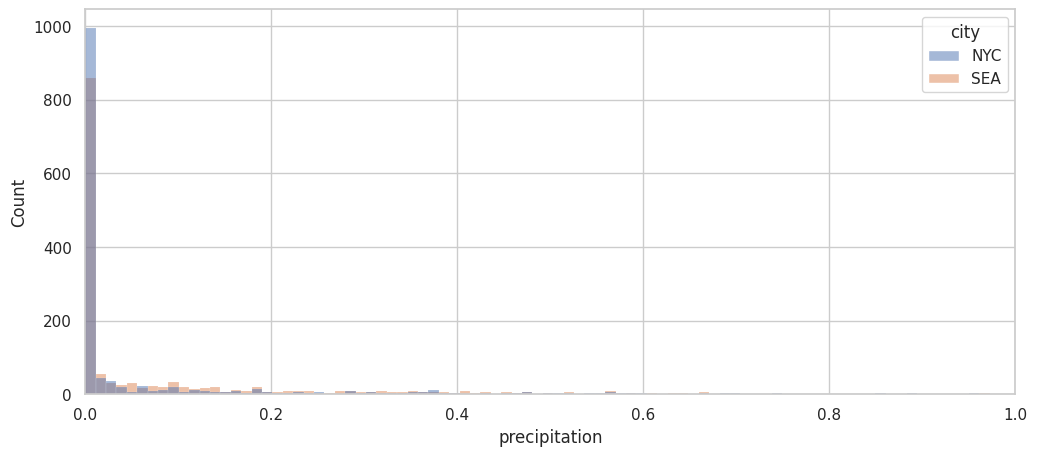

In [21]:
plt.figure(figsize=(12, 5))
sns.histplot(data=df, x="precipitation", hue="city", bins="auto")
plt.xlim(0, 1)
plt

This plot shows that in the 4 year span, there were fewer rainy days in New york than in Seattle by about 200 more days.

###Plot 3

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0.5, 0, 'log(rain)')

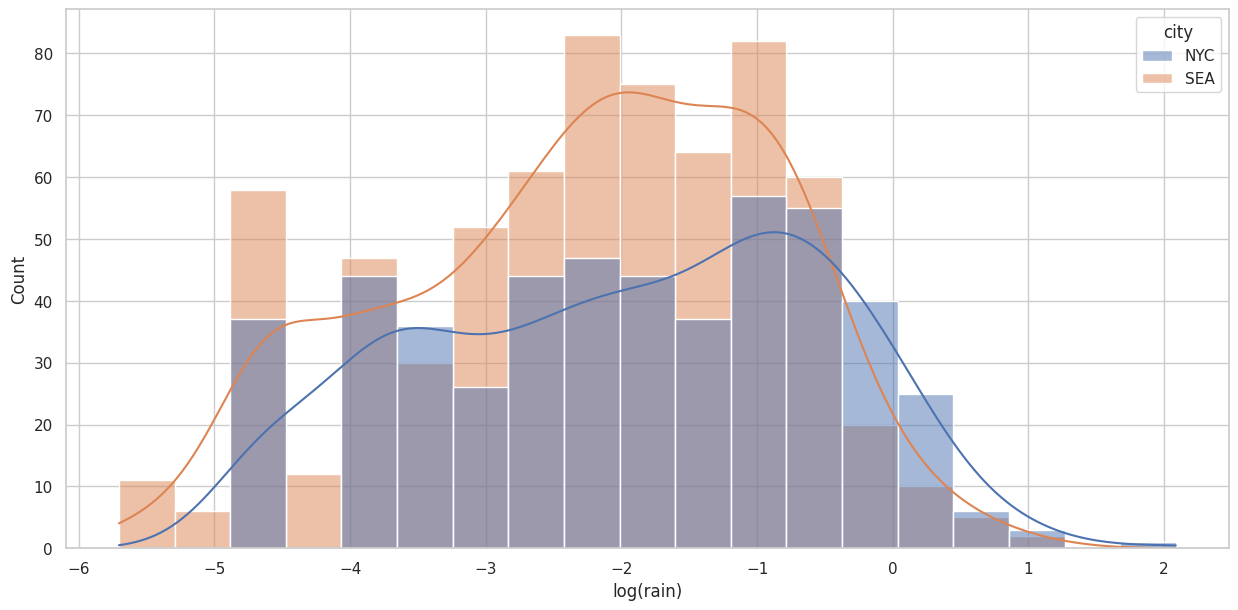

In [10]:
df["log_precip"] = np.log(df["precipitation"])
plt.figure(figsize=(15, 7))
h = sns.histplot(data=df, x="log_precip", hue="city", bins="auto", kde=True)
plt.xlabel("log(rain)")

Inspecting deeper, this plot shows the nature of rain fall in each city. It reveals that Seattle has more rainy days, however, it doesn't experience as heavy rain showers as it does in New york on the days that it does rain.

###Plot 3

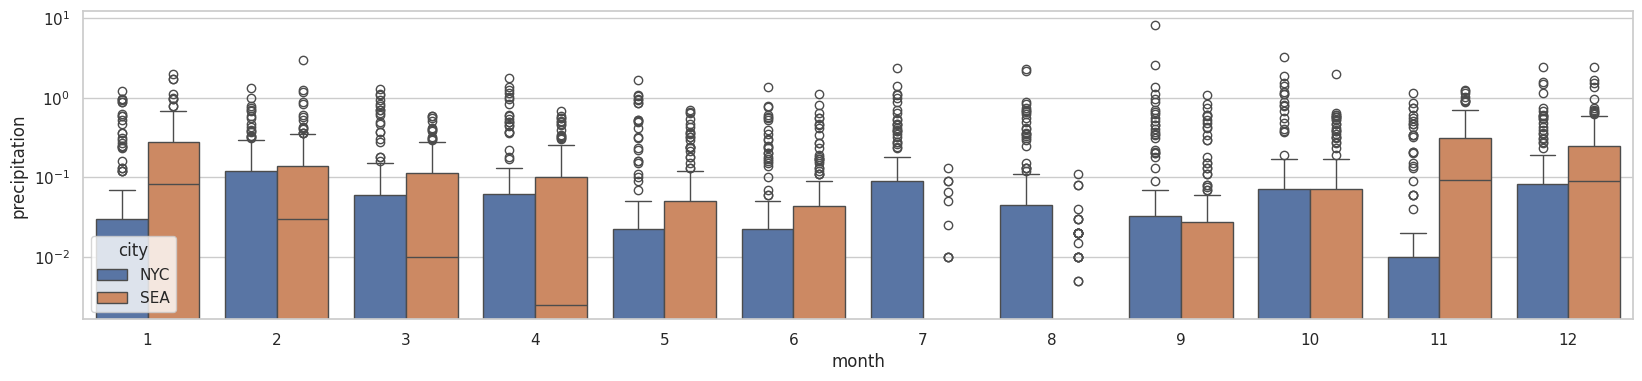

In [11]:
plt.figure(figsize=(20,4))

sns.boxplot(data = df, x = 'month', y = 'precipitation', hue='city');
plt.yscale("log")

This plot shows how seattle experiences little to no rain during the peak of summer while it rains in New York. This is something to consider in terms of how rain is exerienced.

## Conclusion

While New York receives more rain overall (higher average precipitation), Seattle experiences rain more frequently (more rainy days). This suggests that New York tends to have fewer, but heavier, rainfall events compared to Seattle's more frequent, lighter showers.